In [1]:
import pandas as pd
import numpy as np

In [2]:
t_data = pd.read_csv("trainData.csv",header = None) 

In [58]:
t_data.shape

(5000, 3001)

In [14]:
tl_data = pd.read_csv("trainLabels.csv")

In [15]:
t_data.head()

,0,0.0,0.0.1,0.0.2,0.0.3,0.0.4,0.0.5,0.0.6,0.0.7,0.0.8,...,0.0.2974,0.0.2975,0.0.2976,0.0.2977,0.0.2978,0.0.2979,0.0.2980,0.0.2981,0.0.2982,0.0.2983
0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [50]:
X = t_data.iloc[0:t_data.shape[0],1:t_data.shape[1]].values

In [51]:
Y = tl_data.iloc[0:tl_data.shape[0],1].values

array([86, 87])

In [52]:
X = np.transpose(X)

In [19]:
X.shape

(3000, 4999)

In [20]:
a = [np.full(4999,1)]
X = np.append(X,a,0)
X.shape

(3001, 4999)

In [21]:
I =  np.identity(X.shape[0])
lam = 1;

In [22]:
C = (np.dot(X,X.T)) + (lam*I)

In [23]:
Cinv = np.linalg.inv(C)

In [24]:
D = np.dot(X,Y)

In [25]:
W = np.dot(Cinv,D)

In [26]:
W[W.shape[0]-1]

83.29568565358022

In [27]:
def ridge(X,Y,lam):
    C = (np.dot(X,X.T) + (lam*np.identity(X.shape[0])))
    Cinv = np.linalg.inv(C)
    D = np.dot(X,Y)
    W = np.dot(Cinv, D)
    return W, W[W.shape[0]-1]

In [29]:
lamb = [0.01, 0.1, 1, 10, 100, 1000]

In [33]:
ans = []
bias = []
for lam in lamb:
    w,b = ridge(X,Y,lam) 
    ans.append(w)
    bias.append(b)

In [32]:
ans[0].shape

(3001,)

mihir


In [35]:
v_data = pd.read_csv("valData.csv")
vl_data = pd.read_csv("valLabels.csv")

In [36]:
V = v_data.iloc[0:v_data.shape[0],1:v_data.shape[1]].values
V = np.transpose(V)
V.shape


(3000, 4999)

In [37]:
b = [np.full(4999,1)]
V = np.append(V,b,0)
V.shape

(3001, 4999)

In [55]:
ans = np.dot(V.T,W)

In [54]:
yl = vl_data.iloc[0:vl_data.shape[0],1].values

In [161]:
err = yl-ans

In [165]:
err.mean()

-0.01933375874349432

In [56]:
errm = []
for w in ans:
    pred = np.dot(V.T,w)
    err = (yl - pred)
    sqerr = np.sqrt(err ** 2)
    errm.append(sqerr.mean())
    
    

ValueError: operands could not be broadcast together with shapes (4999,) (4999,3001) 

In [1]:
import matplotlib.pyplot as plt

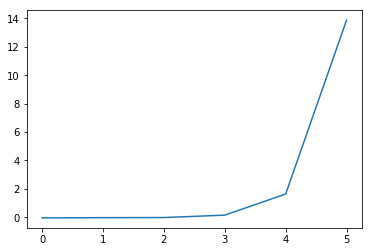

In [27]:
plt.plot(errm)

In [46]:
test = pd.read_csv("testData.csv")

In [47]:
Y_test = test.iloc[0:test.shape[0],1].values

(4999,)